Soft_Computing 
Assignment3
ID: 170104066
Last Three Digit of ID = 066
066 % 3 = 0, 
So, my dataset is Dataset 1
Model = 066+1 % 5 = 2 
So, Model Bidirectional LSTM

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data = pd.read_csv('/content/drive/MyDrive/SC3/Dataset 1.csv', engine = 'python')
data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [14]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['label'].value_counts(0))
data

0    8000
1    2314
Name: label, dtype: int64


,message,label
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [15]:
EPOCH = 15

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [16]:
print(dataTrain['label'].value_counts())
dataTrain

print(dataVal['label'].value_counts())
dataVal

print(dataTest['label'].value_counts())
dataTest

0    4784
1    1406
Name: label, dtype: int64
0    1606
1     456
Name: label, dtype: int64
0    1610
1     452
Name: label, dtype: int64


,message,label
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [17]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])



In [18]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2072576   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 512)         788480    
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 1024)        4198400   
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 128)         557568    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 16)                8768      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 7,625,809
Trainable params: 7,625,809
Non-trainable params: 0
____________________________________________

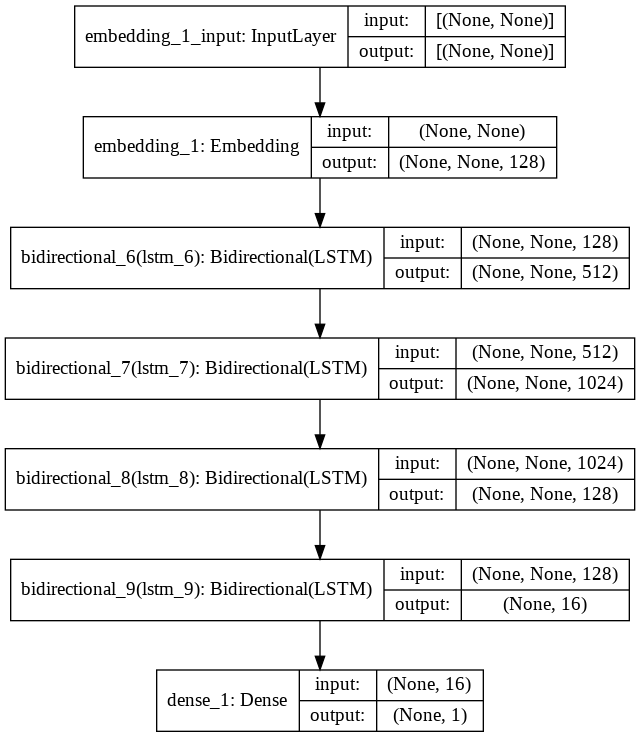

In [19]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.LSTM(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.LSTM(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/15
194/194 [==============================] - 59s 238ms/step - loss: 0.5594 - accuracy: 0.7735 - val_loss: 0.5282 - val_accuracy: 0.7789
Epoch 2/15
194/194 [==============================] - 42s 219ms/step - loss: 0.5336 - accuracy: 0.7729 - val_loss: 0.5254 - val_accuracy: 0.7789
Epoch 3/15
194/194 [==============================] - 42s 219ms/step - loss: 0.5313 - accuracy: 0.7729 - val_loss: 0.5227 - val_accuracy: 0.7789
Epoch 4/15
194/194 [==============================] - 42s 219ms/step - loss: 0.5271 - accuracy: 0.7729 - val_loss: 0.5163 - val_accuracy: 0.7789
Epoch 5/15
194/194 [==============================] - 43s 219ms/step - loss: 0.5093 - accuracy: 0.7729 - val_loss: 0.4825 - val_accuracy: 0.7789
Epoch 6/15
194/194 [==============================] - 42s 219ms/step - loss: 0.4669 - accuracy: 0.7738 - val_loss: 0.4516 - val_accuracy: 0.7963
Epoch 7/15
194/194 [==============================] - 43s 219ms/step - loss: 0.4478 - accuracy: 0.8325 - val_loss: 0.4390 - val_ac

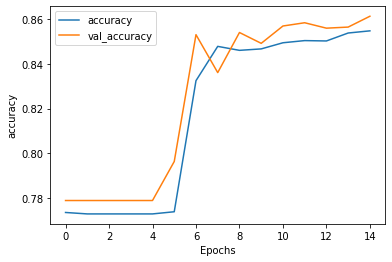

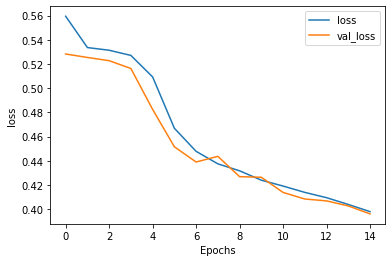


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.773506 	   0.559439 	   0.778856 	   0.528240
       2   0.772859 	   0.533574 	   0.778856 	   0.525394
       3   0.772859 	   0.531348 	   0.778856 	   0.522734
       4   0.772859 	   0.527071 	   0.778856 	   0.516261
       5   0.772859 	   0.509292 	   0.778856 	   0.482486
       6   0.773829 	   0.466885 	   0.796314 	   0.451585
       7   0.832472 	   0.447824 	   0.853055 	   0.439006
       8   0.847819 	   0.437503 	   0.836081 	   0.443720
       9   0.846042 	   0.431735 	   0.854025 	   0.426907
      10   0.846688 	   0.424011 	   0.849176 	   0.426410
      11   0.849435 	   0.419147 	   0.856935 	   0.413882
      12   0.850404 	   0.413915 	   0.858390 	   0.408443
      13   0.850242 	   0.409545 	   0.855965 	   0.406890
      14   0.853796 	   0.403947 	   0.856450 	   0.402733
      15   0.854766 	   0.398018 	   0.861300 	   0.396130


In [20]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 21s 92ms/step - loss: 0.3902 - accuracy: 0.8598
Train Loss: 0.39019161462783813
Train Accuracy: 0.8597738146781921 (Model Metric)
Train Accuracy: 0.8597738287560581 (sklearn Metric)
Train Precision: 0.888728323699422
Train Recall: 0.43741109530583216
Train F1-score: 0.5862726406101049


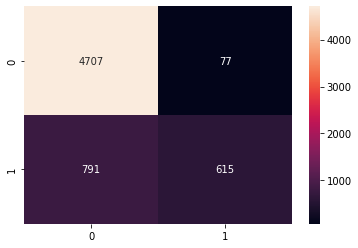

In [21]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 5s 70ms/step - loss: 0.3961 - accuracy: 0.8613
Validation Loss: 0.3961302936077118
Validation Accuracy: 0.8612996935844421 (Model Metric)
Validation Accuracy: 0.8612997090203686 (sklearn Metric)
Validation Precision: 0.8794642857142857
Validation Recall: 0.43201754385964913
Validation F1-score: 0.5794117647058824


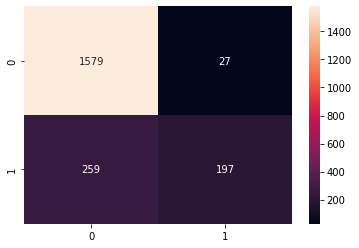

In [22]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 7s 63ms/step - loss: 0.3868 - accuracy: 0.8671
Test Loss: 0.3867647349834442
Test Accuracy: 0.867119312286377 (Model Metric)
Test Accuracy: 0.8671193016488846 (sklearn Metric)
Test Precision: 0.8869565217391304
Test Recall: 0.45132743362831856
Test F1-score: 0.5982404692082111


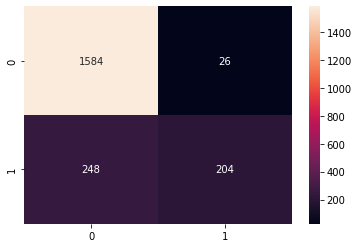

In [23]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')